In [54]:
import pandas as pd
import numpy as np
import scipy as sc

from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
data = pd.read_csv('./credit_card_default_analysis.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Данные

* LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
* default - индикатор невозврата денежных средств

In [56]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Задание

#### 1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

In [57]:
data_default_0 = data[data.default == 0]
data_default_1 = data[data.default == 1]

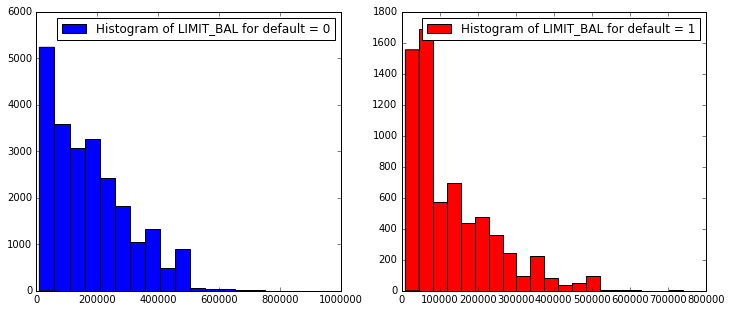

In [58]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(data_default_0.LIMIT_BAL, bins = 20, color = 'b', label = 'Histogram of LIMIT_BAL for default = 0')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data_default_1.LIMIT_BAL, bins = 20, color = 'r', label = 'Histogram of LIMIT_BAL for default = 1')
plt.legend()

plt.show();

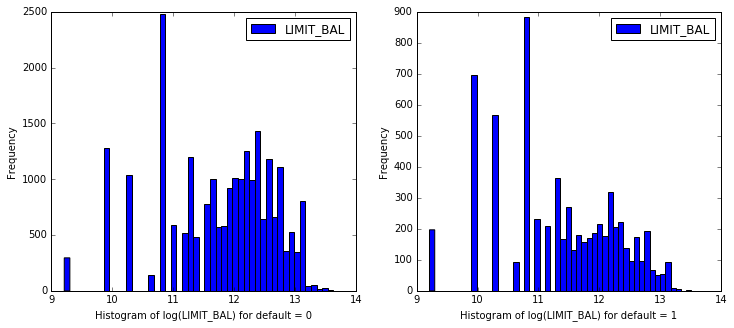

In [59]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
np.log(data[data['default'] == 0]['LIMIT_BAL']).plot.hist(bins=50)
plt.xlabel('Histogram of log(LIMIT_BAL) for default = 0')
plt.legend()

plt.subplot(1,2,2)
np.log(data[data['default'] == 1]['LIMIT_BAL']).plot.hist(bins=50)
plt.xlabel('Histogram of log(LIMIT_BAL) for default = 1')
plt.legend()

plt.show();

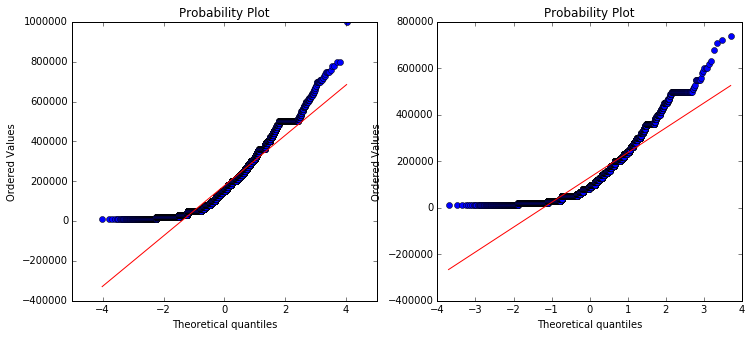

In [60]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
sc.stats.probplot(data[data['default'] == 0]['LIMIT_BAL'], dist="norm", plot=pylab)
plt.legend()

plt.subplot(1,2,2)
sc.stats.probplot(data[data['default'] == 1]['LIMIT_BAL'], dist="norm", plot=pylab)
plt.legend()

plt.show();

Из графиков видно, что распределение не равномерное => будем использовать непараметрические методы

In [61]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [62]:
np.random.seed(0)

median_scores_0 = map(np.median, get_bootstrap_samples(data_default_0.LIMIT_BAL.values, 1000))
median_scores_1 = map(np.median, get_bootstrap_samples(data_default_1.LIMIT_BAL.values, 1000))

print "95% confidence interval for the data_default_0.LIMIT_BAL median repair time:",  stat_intervals(median_scores_0, 0.05)
print "95% confidence interval for the data_default_1.LIMIT_BAL median repair time:",  stat_intervals(median_scores_1, 0.05)

95% confidence interval for the data_default_0.LIMIT_BAL median repair time: [150000.0, 150000.0]
95% confidence interval for the data_default_1.LIMIT_BAL median repair time: [80000.0, 90000.0]


In [63]:
print "difference between medians:", np.median(data_default_0.LIMIT_BAL.values) - np.median(data_default_1.LIMIT_BAL.values)

difference between medians: 60000.0


In [64]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(median_scores_0, median_scores_1))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-70000.0, -60000.0]


Интервальные оценки не пересекаются, а интервальная оценка разности не содержит 0 => делаем вывод, что медианы выборок отличаются

Проверим гипотезу о равенстве средних

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [65]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [66]:
print "p-value: %f" % permutation_test(data_default_0.LIMIT_BAL.values, data_default_1.LIMIT_BAL.values, max_permutations = 10000)

p-value: 0.000100


Получили достигаемый уровень значимости заметно меньше 0.05. Можем уверенно отвергнуть нулевую гипотезу.

Распределения значений кредитов различаются.

Не вижу практической значимости данного результата, кредит могут не вернуть при любом лимите

#### 2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

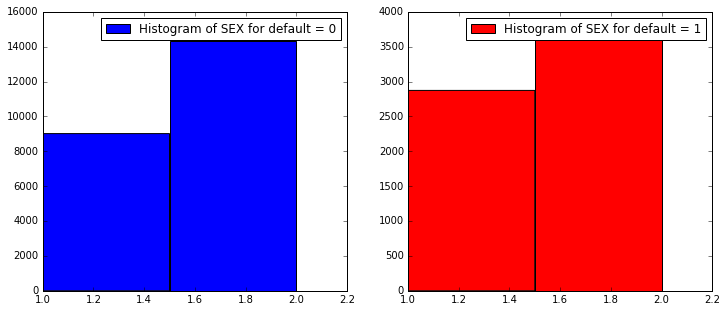

In [67]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(data_default_0.SEX, bins = 2, color = 'b', label = 'Histogram of SEX for default = 0')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data_default_1.SEX, bins = 2, color = 'r', label = 'Histogram of SEX for default = 1')
plt.legend()

plt.show();

Из графиков видно, что генеральный состав не одинаков

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) <> F_{X_2}(x)$

In [68]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [69]:
print "95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(data_default_0.SEX - 1, data_default_1.SEX - 1)

95% confidence interval for a difference between proportions: [0.033635, 0.060548]


In [70]:
print "p-value: %e" % proportions_diff_z_test(proportions_diff_z_stat_ind(data_default_0.SEX - 1, data_default_1.SEX - 1))

p-value: 4.472867e-12


Достигаемый уровень значимости << 0.05, а доверительный интервал не включает 0 => отвергаем нулевую гепотезу о равенстве генеральных совокупностей

#### 3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг? наоборт, не отдаст долг?

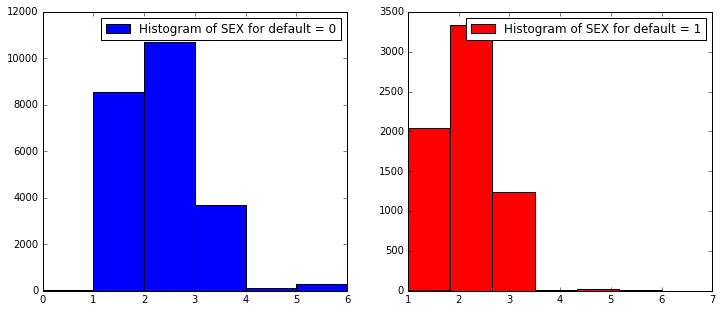

In [71]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(data_default_0.EDUCATION, bins = 6, color = 'b', label = 'Histogram of SEX for default = 0')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data_default_1.EDUCATION, bins = 6, color = 'r', label = 'Histogram of SEX for default = 1')
plt.legend()

plt.show();

H0: Образование и возврат кредита не зависят друг от друга

Н1: Зависимость есть

In [72]:
educs = {
    0:'doctor', 
    1:'Master', 
    2:'BA', 
    3:'high school graduate', 
    4:'primary education', 
    5:'Other', 
    6:'not available'
}

tb = pd.DataFrame(np.zeros((7, 2)))

for key in educs:
    tb.iloc[key, 0] = float(data[(data.default == 0) & (data.EDUCATION == key)].shape[0])
    tb.iloc[key, 1] = float(data[(data.default == 1) & (data.EDUCATION == key)].shape[0])
    
tb.index = educs.values()
tb.columns = ['Good Credit', 'Bad Credit']
tb

,Good Credit,Bad Credit
doctor,14.0,0.0
Master,8549.0,2036.0
BA,10700.0,3330.0
high school graduate,3680.0,1237.0
primary education,116.0,7.0
Other,262.0,18.0
not available,43.0,8.0


In [73]:
from scipy.stats import chi2_contingency
_, p, _, _ = chi2_contingency(tb)
print "p-value: %e" % p

p-value: 1.233263e-32


Достигаемый уровень значимости << 0.05 => можно отвергнуть Н0

Между признаками есть связь

Из таблицы видно, что доктора всегда возвращают свои долги, а бакалавры наоборот, любят не возвращать, хотя если невозвратом считается пропуск 3-х подрят платежей, то все логично, в универе с деньгами могут быть проблемы

#### 4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

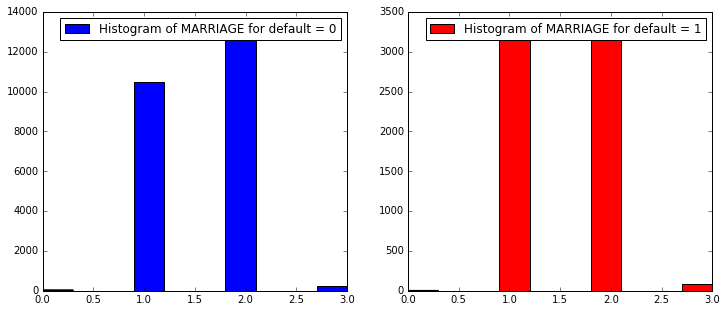

In [74]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(data_default_0.MARRIAGE, color = 'b', label = 'Histogram of MARRIAGE for default = 0')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data_default_1.MARRIAGE, color = 'r', label = 'Histogram of MARRIAGE for default = 1')
plt.legend()

plt.show();

Н0 признаки 'MARRIAGE' и 'default' независимы

Н1 зависимость между указанными признаками есть

In [75]:
statuses = {
    0:"refuse to answer", 
    1:"Married", 
    2:"Single", 
    3:"not available"
}

tb = pd.DataFrame(np.zeros((4, 2)))

for key in statuses:
    tb.iloc[key, 0] = float(data[(data.default == 0) & (data.MARRIAGE == key)].shape[0])
    tb.iloc[key, 1] = float(data[(data.default == 1) & (data.MARRIAGE == key)].shape[0])
    
tb.index = statuses.values()
tb.columns = ['Good Credit', 'Bad Credit']
tb

,Good Credit,Bad Credit
refuse to answer,49.0,5.0
Married,10453.0,3206.0
Single,12623.0,3341.0
not available,239.0,84.0


In [76]:
_, p, _, _ = chi2_contingency(tb)

print "p-value: %e" % p

p-value: 8.825862e-08


Достигаемый уровень значимости << 0 => зваисимость между признаками есть

#### 5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

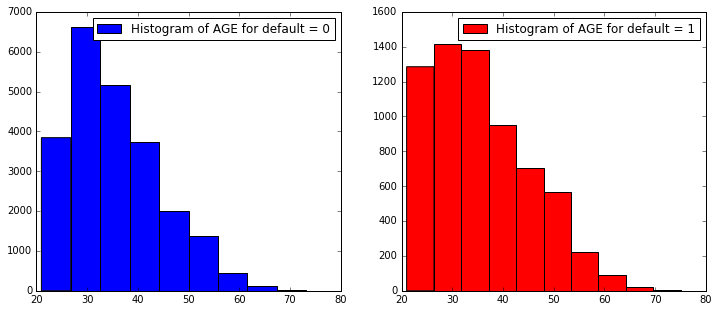

In [77]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(data_default_0.AGE, color = 'b', label = 'Histogram of AGE for default = 0')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data_default_1.AGE, color = 'r', label = 'Histogram of AGE for default = 1')
plt.legend()

plt.show();

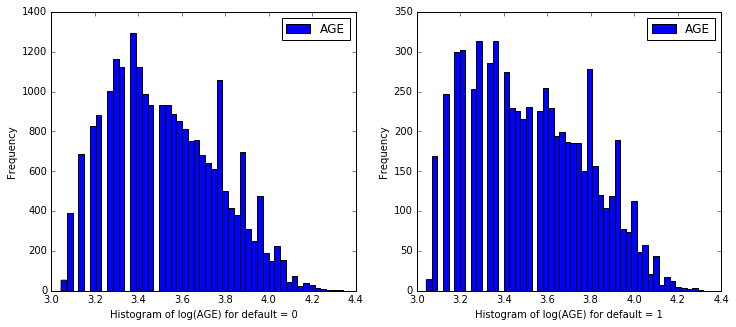

In [78]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
np.log(data[data['default'] == 0]['AGE']).plot.hist(bins=50)
plt.xlabel('Histogram of log(AGE) for default = 0')
plt.legend()

plt.subplot(1,2,2)
np.log(data[data['default'] == 1]['AGE']).plot.hist(bins=50)
plt.xlabel('Histogram of log(AGE) for default = 1')
plt.legend()

plt.show();

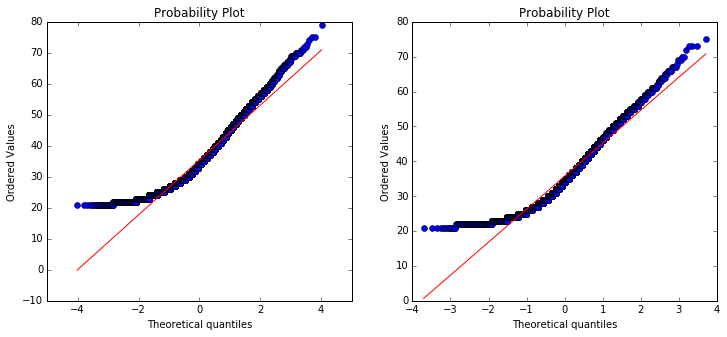

In [79]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
sc.stats.probplot(data[data['default'] == 0]['AGE'], dist="norm", plot=pylab)
plt.legend()

plt.subplot(1,2,2)
sc.stats.probplot(data[data['default'] == 1]['AGE'], dist="norm", plot=pylab)
plt.legend()

plt.show();

Из графиков видно, что распределение не равномерное => будем использовать непараметрические методы

Н0 медиана совпадает

Н1 медианы двух выборок не совпадают

In [80]:
np.random.seed(0)

median_scores_0 = map(np.median, get_bootstrap_samples(data_default_0.AGE.values, 1000))
median_scores_1 = map(np.median, get_bootstrap_samples(data_default_1.AGE.values, 1000))

print "95% confidence interval for the data_default_0.AGE median repair time:",  stat_intervals(median_scores_0, 0.05)
print "95% confidence interval for the data_default_1.AGE median repair time:",  stat_intervals(median_scores_1, 0.05)

95% confidence interval for the data_default_0.AGE median repair time: [34.0, 34.0]
95% confidence interval for the data_default_1.AGE median repair time: [34.0, 35.0]


In [81]:
print "difference between medians:", np.median(data_default_0.AGE.values) - np.median(data_default_1.AGE.values)

difference between medians: 0.0


In [82]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(median_scores_0, median_scores_1))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [0.0, 1.0]


Интервальные оценки пересекаются, а интервальная оценка разности включает 0 => нулевую гипотезу мы отвергнуть не можем

медианы совпадают

Проверим гипотезу о равенстве средних

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [83]:
print "p-value: %f" % permutation_test(data_default_0.AGE.values, data_default_1.AGE.values, max_permutations = 10000)

p-value: 0.017700


Достигаемый уровень значимости позволяет отвергунть нулевую гипотезу

средние не равны

Сложно сказать о практической значимости, мне кажется, что знание того, что средний возраст "хороших" и "плохих" клиентов дает нам чуть больше чем средняя температура по больнице